## Filtering

This notebook is for streamlining the filtering process that occurs after ipyrad. This way, I can rerun the notebook with different filenames instead of do it from scratch each time.

**[1]** Change working directory to assembly outfiles

In [6]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles


**[2]** Make directory for new/edited outfiles from ipyrad, called ``new_outfiles``.

In [7]:
!mkdir new_outfiles

**[3]** Use ``vcftools`` to filter for biallelic loci and minor allele frequency. Manual [here](http://vcftools.sourceforge.net/man_latest.html).

Be sure to change:
- name of input vcf file
- name of output vcf file

In [8]:
!vcftools --vcf cragig_lanes_12_002.vcf \ # change!
--min-alleles 2 --max-alleles 2 \
--maf .05 \
--out new_outfiles/cragig_lanes_12_002_biall_maf \ # change!
--recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig_lanes_12_002.vcf
	--maf 0.05
	--max-alleles 2
	--min-alleles 2
	--out new_outfiles/cragig_lanes_12_002_biall_maf
	--recode

After filtering, kept 138 out of 138 Individuals
Outputting VCF file...
After filtering, kept 3254 out of a possible 17479 Sites
Run Time = 1.00 seconds


**[4]** Make dictionary for translating STR file locus names to VCF file locus names

In a few steps, we will use [PGD Spider](http://www.cmpg.unibe.ch/software/PGDSpider/) to convert the filtered VCF file into a STR file, which can be read into ``adegenet`` for population genetic statistics. However, PGD Spider will give loci arbitrary names: SNP_1, SNP_2, SNP_3, etc. So, we will need to give them informative names based on the locus number and position in the VCF file in order to make use of the population genetic statistics.

Be sure to change the name of the filtered VCF file. Your filtered vcf file will be the name you gave it plus ``.recode.vcf``

In [10]:
vcf_file = open("new_outfiles/cragig_lanes_12_002_biall_maf.recode.vcf","r") # change!
vcf_file_lines = vcf_file.readlines()
vcf_file.close()

In [11]:
locus_names = {}
snp_name_count = 1

for line in vcf_file_lines:
    if line[0] != "#":
        linelist = line.strip().split()
        locus = linelist[0]
        pos = linelist[1]
        vcf_locus_name = locus + "_" + pos
        str_locus_name = "SNP_" + str(snp_name_count)
        snp_name_count += 1
        locus_names[str_locus_name] = vcf_locus_name      

**[5]** Extract read depth information by locus from VCF file. 

This block of code will make a dictionary with the VCF locus file names as keys and lists of read depths (across samples) as values. Plot average read depth (across samples) per locus.

In [20]:
sample_list = []
snp_name_list = []
rdd = {} 

for line in vcf_file_lines:
    if line[0:1] == "#C":
        linelist = line.strip().split()
        sample_list += linelist[9:]
    elif line[0] != "#": # ignore header lines
        genblocks = line.strip().split()
        snp_name = genblocks[0] + "_" + genblocks[1] # name formate.g., locus_47_1
        snp_name_list.append(snp_name)
        for genblock in genblocks[9:]: # start on genotype lines
            genblocklist = genblock.split(":")
            rd = int(genblocklist[1])
            if snp_name not in rdd:
                rdd[snp_name] = [rd]
            elif snp_name in rdd:
                rdd[snp_name] += [rd]
            else:
                print "something funky going on"

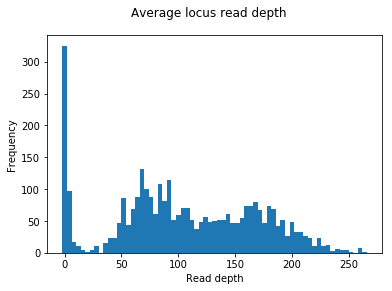

In [24]:
import matplotlib.pyplot as plt
import numpy as np

locus_rd_avs = []
for snp in snp_name_list:
    locus_rd_avs.append(np.mean(rdd[snp]))
    
plt.hist(locus_rd_avs, bins = np.arange(0,max(locus_rd_avs),4)-2)
plt.suptitle("Average locus read depth")
plt.xlabel("Read depth")
plt.ylabel("Frequency")
plt.show()

**[6]** Make STR file out of filtered VCF using PGD Spider. 

This is done in the GUI.



![img]()


![img]()